In [ ]:
import pandas as pd, numpy as np
import pickle, seaborn as sns
from matplotlib import pyplot as plt


data = pickle.load(open('../germeval/diferent_persona_vectors_train.pickle', 'rb'))

personas = ["You are an expert in social psychology. When you are asked a question, you prefer to give short, concrete answers.",
"You are an expert in social psychology.",
"",
"You are a Linguist.",
"You are a content moderator.",
"You are a psychologist.",
"You are a social media expert.",
"You are a political scientist.",
"You are a sociologist.",]

data_icl = pickle.load(open('../germeval/train.csv-icl-adj.pickle', 'rb'))
data_icl.keys()

In [11]:
len(data_icl['id']), len(data[0]['id'])

(5009, 5009)

In [19]:
data_icl['id'][0], data[0]['id'][0]

(442, 0)

In [21]:
data['icl'] = {'id':[], 'values':[], 'text':[]}
for i in range(len(data_icl['id'])):
	inx = data_icl['id'].index(data[0]['id'][i])
	if inx == -1:
		print(f"ID {data_icl['id'][i]} not found in data[0]['id']")
		continue
	data['icl']['id'].append(data_icl['id'][inx])
	data['icl']['values'].append(data_icl['values'][inx])
	data['icl']['text'].append(data_icl['text'][inx])

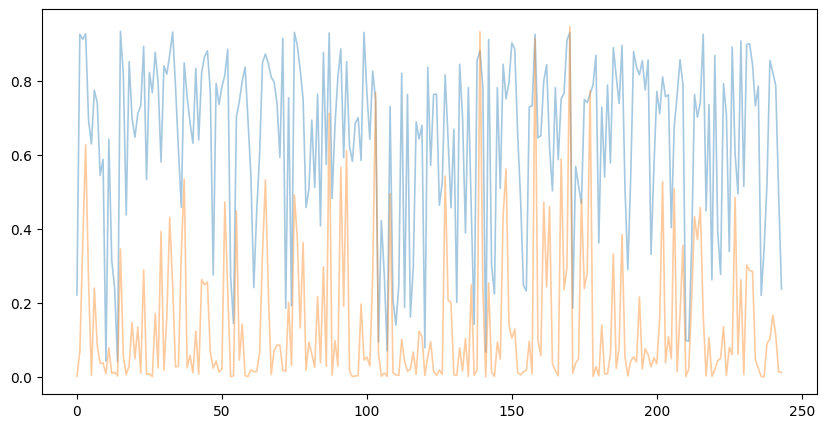

In [23]:
# Values for entry 0 in the training data fro all 9 prompts

plt.figure(figsize=(10,5))
plt.plot(range(len(data[0]['values'][0])), data[0]['values'][0], alpha=0.4, linestyle='-', linewidth=1.2)
plt.plot(range(len(data['icl']['values'][0])), data['icl']['values'][0], alpha=0.4, linestyle='-', linewidth=1.2)

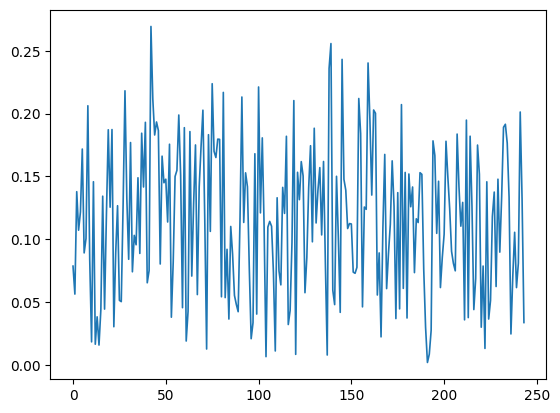

In [6]:
# for each feature in the entry 0, the mean difference between all pairs of personas
dif = []

for k in range(len(data[0]['values'][0])):
	dif.append([])
	for i in range(len(data)):
		for j in range(i+1, len(data)):
			dif[k].append(abs(data[i]['values'][0][k] - data[j]['values'][0][k]))

z = np.array(dif).mean(axis=-1)
plt.plot(range(len(z)), z, linestyle='-', linewidth=1.2)

In [24]:
values_per_instance = np.array([np.array(data[0]['values']), np.array(data['icl']['values'])])
# values_per_instance = values_per_instance[:, np.random.choice(values_per_instance.shape[1], 1000, replace=False)]

print(values_per_instance.shape)

(2, 5009, 244)


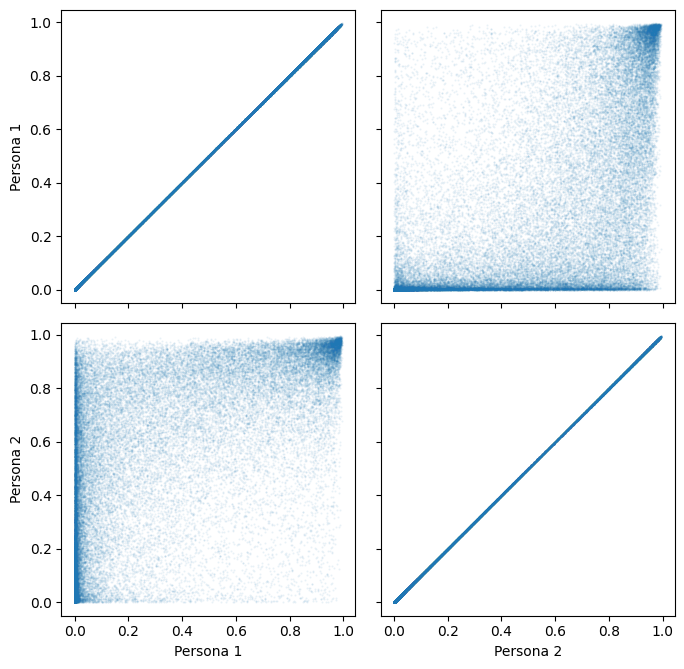

In [39]:
#scatter plot
personas = [personas[0], 'P0 + ICL']
## for each pair of personas plot a scatter using the sample tensor, len(sample) = len(personas)
nsample = values_per_instance[:, np.random.choice(values_per_instance.shape[1], 200, replace=False)]
nsample = nsample.reshape(nsample.shape[0], -1)

fig, axes = plt.subplots(len(personas), len(personas), figsize=(7, 7), 
                         	sharex=True, sharey=True, )
# fig.suptitle("Correlation in Values from different Personas", fontsize=16)

for i in range(len(personas)):
    for j in range(len(personas)):
        ax = axes[i, j]
        ax.scatter(nsample[i], nsample[j], alpha=0.1, 
                    linewidths=0.01, s=2)
        if i == len(personas) - 1:
            ax.set_xlabel(f"Persona {j+1}")
        if j == 0:
            ax.set_ylabel(f"Persona {i+1}")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


In [42]:

from itertools import combinations
# from scipy.stats import spearmanr
from scipy.stats import pearsonr
import seaborn as sns

pearsonr(nsample[0], nsample[1])

PearsonRResult(statistic=np.float64(0.6299530459611955), pvalue=np.float64(0.0))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


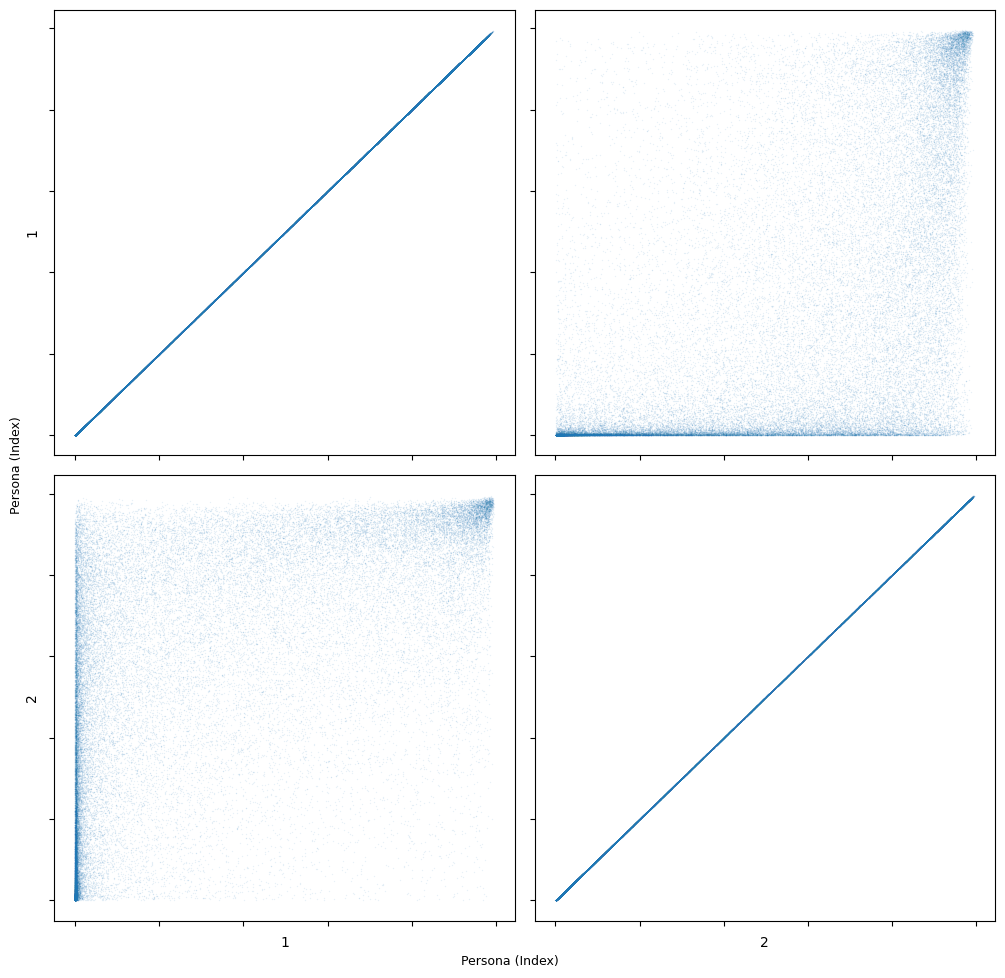

In [27]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(len(personas), len(personas), figsize=(10, 10), 
                          sharex=True, sharey=True)
# fig.suptitle("Correlation in Values from Different Personas", fontsize=16)

for i in range(len(personas)):
    for j in range(len(personas)):
        ax = axes[i, j]
        ax.scatter(nsample[i], nsample[j], alpha=0.1,
                    linewidths=0.001, s=1)
        
        # Set axis labels for only the outer plots
        if i == len(personas) - 1:
            ax.set_xlabel(f"{j+1}")  # Only the index for x-axis
        else:
            ax.set_xticklabels([])  # Remove inner x-tick labels
            
        if j == 0:
            ax.set_ylabel(f"{i+1}")  # Only the index for y-axis
        else:
            ax.set_yticklabels([])  # Remove inner y-tick labels

# Adding overarching labels for axes
fig.text(0.5, 0.00, 'Persona (Index)', ha='center', fontsize=9)
fig.text(-0.0, 0.5, 'Persona (Index)', va='center', rotation='vertical', fontsize=9)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig('scatter_corr_gemeval.eps', dpi=600)
plt.show()

In [29]:
personas

['You are an expert in social psychology. When you are asked a question, you prefer to give short, concrete answers.',
 'You are an expert in social psychology.',
 '',
 'You are a Linguist.',
 'You are a content moderator.',
 'You are a psychologist.',
 'You are a social media expert.',
 'You are a political scientist.',
 'You are a sociologist.']

## tsnh

In [2]:
import pandas as pd, numpy as np
import pickle, seaborn as sns
from matplotlib import pyplot as plt


data = pickle.load(open('../tsnh/diferent_persona_vectorstrain.csv.pickle', 'rb'))

personas = ["You are an expert in social psychology. When you are asked a question, you prefer to give short, concrete answers.",
"You are an expert in social psychology.",
"",
"You are a Linguist.",
"You are a content moderator.",
"You are a psychologist.",
"You are a social media expert.",
"You are a political scientist.",
"You are a sociologist.",]

data_icl = pickle.load(open('../tsnh/TSNH_uniform.csv-icl-adj.pickle', 'rb'))
data_icl.keys()

dict_keys(['id', 'text', 'values'])

In [3]:
len(data_icl['id']), len(data[0]['id']), data_icl['id'][0], data[0]['id'][0]

(4640, 13923, 'UghhT_I_mYX6ongCoAEC', 'Ugw-_mfnTo9SUniGGTN4AaABAg')

In [9]:
len(data_icl['id'])

4640

In [12]:
data['icl'] = {'id':[], 'values':[], 'text':[]}
data['orig'] = {'id':[], 'values':[], 'text':[]}

for i in range(len(data[0]['id'])):

	if data[0]['id'][i] not in data_icl['id']:
		continue
	inx = data_icl['id'].index(data[0]['id'][i])
	if inx == -1:
		print(f"ID {data_icl['id'][i]} not found in data[0]['id']")
		continue
	data['icl']['id'].append(data_icl['id'][inx])
	data['icl']['values'].append(data_icl['values'][inx])
	data['icl']['text'].append(data_icl['text'][inx])

	data['orig']['id'].append(data[0]['id'][i])
	data['orig']['values'].append(data[0]['values'][i])
	data['orig']['text'].append(data[0]['text'][i])

In [14]:
values_per_instance = np.array([np.array(data['orig']['values']), np.array(data['icl']['values'])])
# values_per_instance = values_per_instance[:, np.random.choice(values_per_instance.shape[1], 1000, replace=False)]

print(values_per_instance.shape)

(2, 4640, 244)


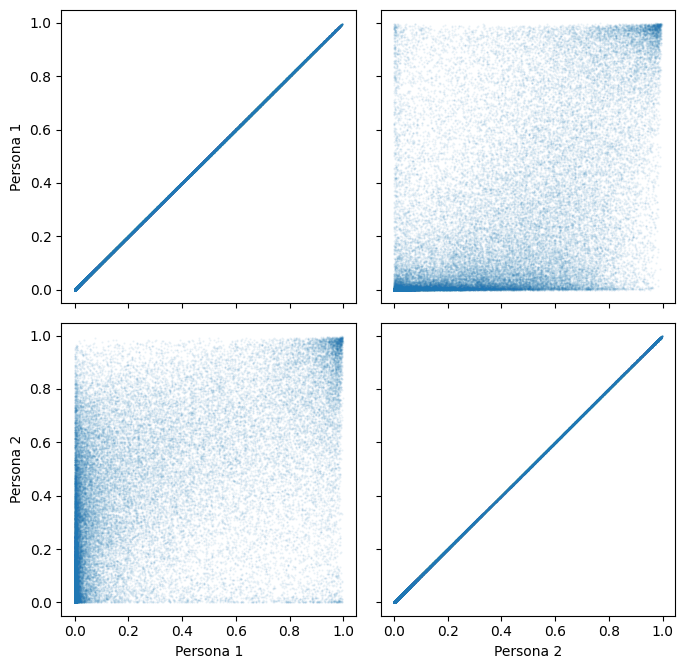

In [15]:
#scatter plot
personas = [personas[0], 'P0 + ICL']
## for each pair of personas plot a scatter using the sample tensor, len(sample) = len(personas)
nsample = values_per_instance[:, np.random.choice(values_per_instance.shape[1], 200, replace=False)]
nsample = nsample.reshape(nsample.shape[0], -1)

fig, axes = plt.subplots(len(personas), len(personas), figsize=(7, 7), 
                         	sharex=True, sharey=True, )
# fig.suptitle("Correlation in Values from different Personas", fontsize=16)

for i in range(len(personas)):
    for j in range(len(personas)):
        ax = axes[i, j]
        ax.scatter(nsample[i], nsample[j], alpha=0.1, 
                    linewidths=0.01, s=2)
        if i == len(personas) - 1:
            ax.set_xlabel(f"Persona {j+1}")
        if j == 0:
            ax.set_ylabel(f"Persona {i+1}")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()



In [16]:

from itertools import combinations
# from scipy.stats import spearmanr
from scipy.stats import pearsonr
import seaborn as sns

pearsonr(nsample[0], nsample[1])

PearsonRResult(statistic=np.float64(0.5868146783080911), pvalue=np.float64(0.0))